In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

#study data files
natural_disasters_df = "data/natural_disasters.csv"

#read the disasters data
disaster_data = pd.read_csv(natural_disasters_df)
disaster_data.head()

#selec columns
columns = disaster_data [['Start Year','ISO','Country','Subregion','Region','Location',
                                   'Disaster Type', 'Disaster Subtype', 
                                   'Origin','Associated Types','Total Deaths','Total Affected',
                                  'Latitude','Longitude']]

#display selected columns
columns.head(100)

,Start Year,ISO,Country,Subregion,Region,Location,Disaster Type,Disaster Subtype,Origin,Associated Types,Total Deaths,Total Affected,Latitude,Longitude
0,2001.0,DJI,Djibouti,Sub-Saharan Africa,Africa,"Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah...",Drought,Drought,NaN,NaN,NaN,100000.0,NaN,NaN
1,2000.0,SDN,Sudan,Northern Africa,Africa,"Northern Darfur, Northern Kordofan, Red Sea pr...",Drought,Drought,NaN,Food shortage|Water shortage,NaN,2000000.0,NaN,NaN
2,2000.0,SOM,Somalia,Sub-Saharan Africa,Africa,"Ceel Barde, Rab Dhuure, Tayeeglow, Xudur distr...",Drought,Drought,NaN,Food shortage,21.0,1200000.0,NaN,NaN
3,2000.0,AGO,Angola,Sub-Saharan Africa,Africa,"Dombre Grande village (Baia Farta district, Be...",Flood,Riverine flood,Heavy rain,NaN,31.0,70000.0,NaN,NaN
4,2000.0,BGD,Bangladesh,Southern Asia,Asia,"Barisal, Chittagong, Dhaka, Khulna, Rajshahi, ...",Extreme temperature,Cold wave,NaN,NaN,49.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2000.0,ROU,Romania,Eastern Europe,Europe,"Alba, Arad, Bihor, Bistrita, Botosani, Brasov,...",Flood,Riverine flood,Snowmelt,NaN,9.0,60431.0,NaN,NaN
96,2000.0,TUR,Türkiye,Western Asia,Asia,"Bursa, Canakkale, Balikesir provinces",Wildfire,Forest fire,NaN,NaN,NaN,350.0,NaN,NaN
97,2000.0,HUN,Hungary,Eastern Europe,Europe,"Borsod-Abauj-Zemplen, Szabolcs-Szatmar-Bereg p...",Flood,Riverine flood,NaN,NaN,1.0,2000.0,NaN,NaN
98,2000.0,AGO,Angola,Sub-Saharan Africa,Africa,Porto Amboim district (Cuanza Sul province),Flood,Flood (General),NaN,NaN,1.0,3000.0,NaN,NaN


### Calculate Total Affected and Total Deaths by Disaster type in a bar chart

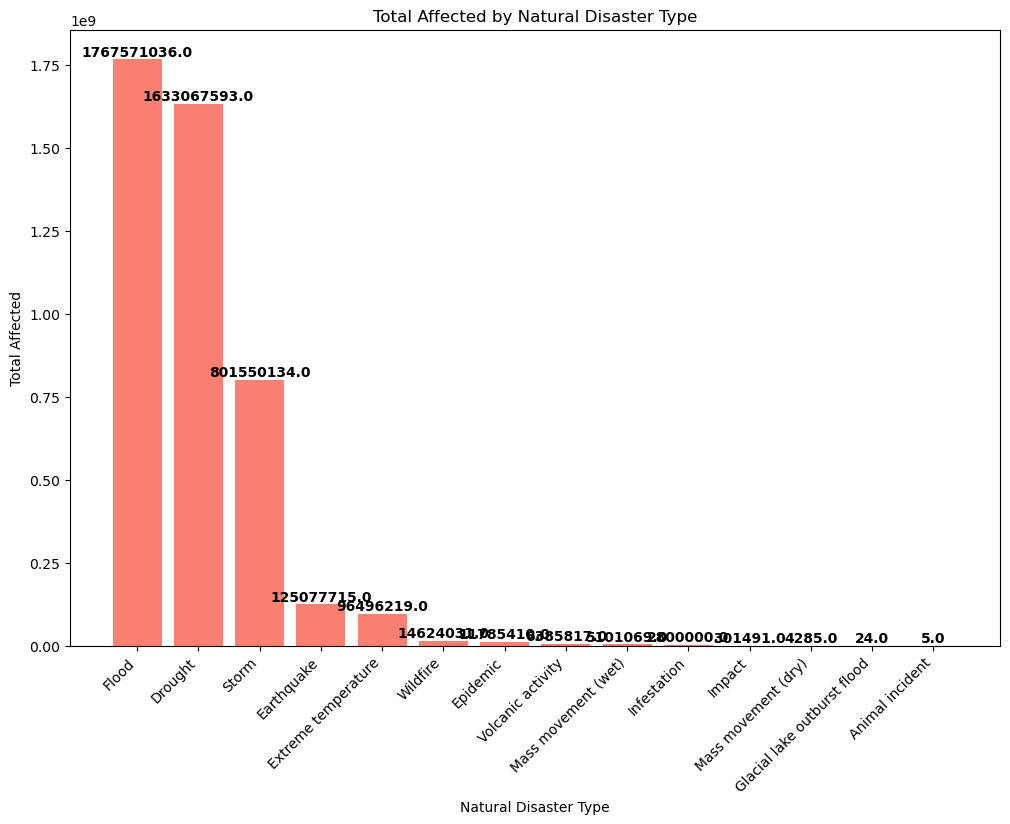

In [4]:
# Group by 'Disaster Type' and sum the total affected for each type
affected_by_disaster = columns.groupby('Disaster Type')['Total Affected'].sum().reset_index()

# Sort the data by total affected in descending order
affected_by_disaster = affected_by_disaster.sort_values(by='Total Affected', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(affected_by_disaster['Disaster Type'], affected_by_disaster['Total Affected'], color='salmon')
plt.title('Total Affected by Natural Disaster Type')
plt.xlabel('Natural Disaster Type')
plt.ylabel('Total Affected')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontweight='bold')

# Show the plot
plt.savefig("naturaldisaster_total_affected.png")
plt.show()

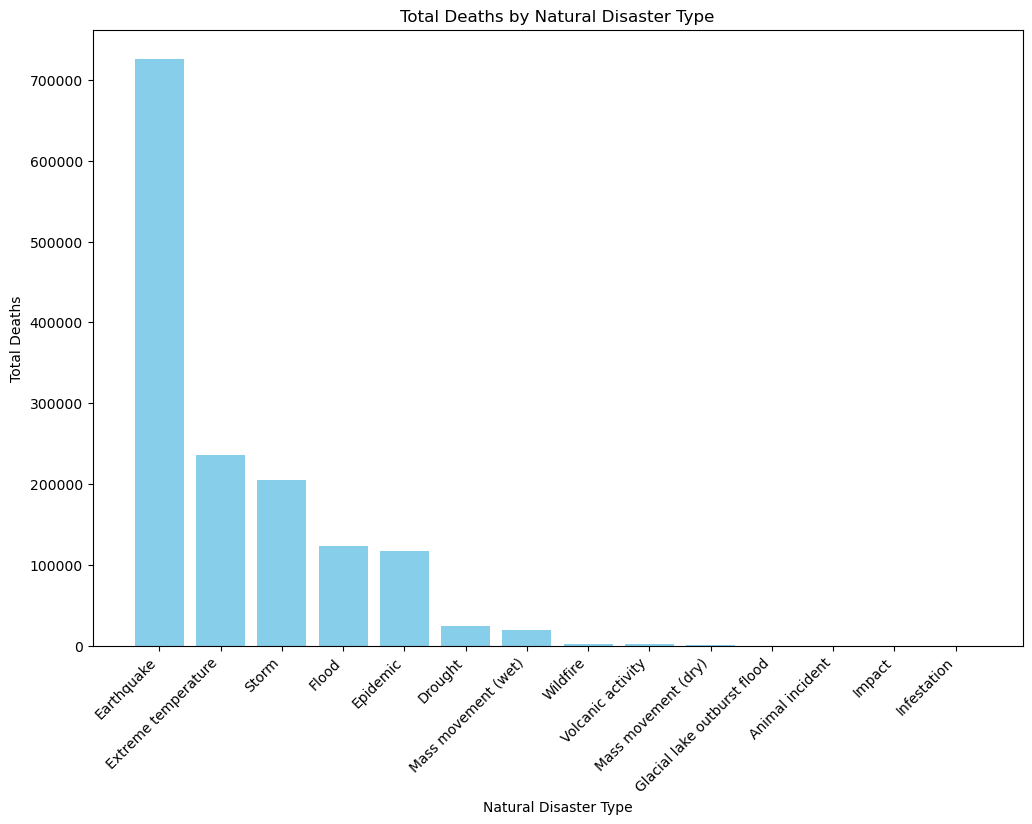

In [5]:
# Group by 'Disaster Type' and sum the total deaths for each type
deaths_by_disaster = columns.groupby('Disaster Type')['Total Deaths'].sum().reset_index()

# Sort the data by total deaths in descending order
deaths_by_disaster = deaths_by_disaster.sort_values(by='Total Deaths', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.bar(deaths_by_disaster['Disaster Type'], deaths_by_disaster['Total Deaths'], color='skyblue')
plt.title('Total Deaths by Natural Disaster Type')
plt.xlabel('Natural Disaster Type')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.savefig("naturaldisaster_total_death.png")
plt.show()

###
The two charts display above showcases the total number of affected and total deaths specfiied by disaster types. The top three natural disasters to have the highest number of people affected are floods at 1767571036, droughts at  1633067593 and storms with 801550134 affected globally. Seemingly, death tolls for each disaster type vary, the top 3 of highest to cause deaths include earthquakes, extreme temperatures and storms, with floods following very closely.

### Find frequency of Disaster types between 2000-2022

<Figure size 15000x800 with 0 Axes>

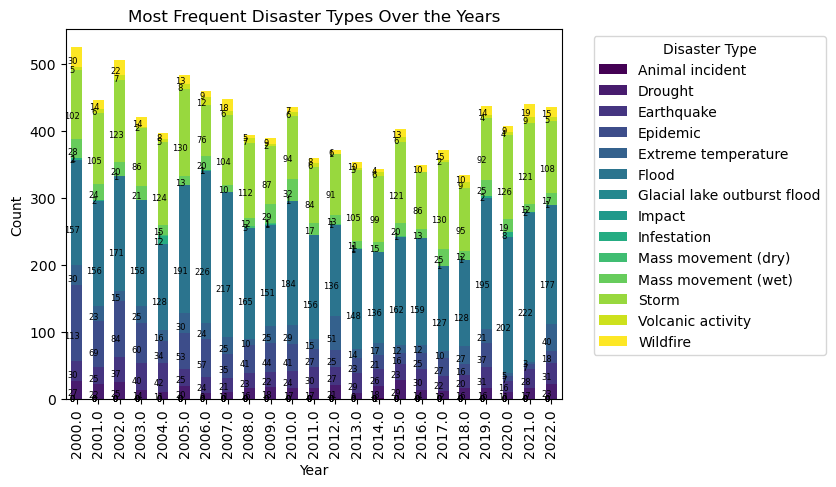

In [6]:
# Group by 'Start Year' and 'Disaster Type', and count the occurrences
disaster_counts = columns.groupby(['Start Year', 'Disaster Type']).size().reset_index(name='Count')

# Pivot the data to have 'Start Year' as index, 'Disaster Type' as columns, and 'Count' as values
pivot_table = disaster_counts.pivot(index='Start Year', columns='Disaster Type', values='Count').fillna(0)

# Plotting the bar graph
plt.figure(figsize=(150, 8))
ax = pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Most Frequent Disaster Types Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display numbers on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 10, y + height / 3), ha='center', va='center', fontsize=6, color='black')

# Show the plot
plt.savefig("disastertype_frequency.png")
plt.show()

# 
The following chart examines the frequency of natural disasters by analyzing the year-to-year variations in their occurrence counts from 2000 to 2022. The graph provides valuable insights into the prevalence of different types of disasters on a global scale during this period. Highlighted in blue emphasizes the prevalence of floods, with 2006 being the year with the highest occurrence, closely followed by 2021. The trend over the years shows noticeable fluctuations. Shifting the focus to wildfires, the year 2000 leads the count with 305 occurrences, followed by 2002 in second place with 227 wildfires globally.

### Compare Total deaths and Total affected per year

<Figure size 1500x800 with 0 Axes>

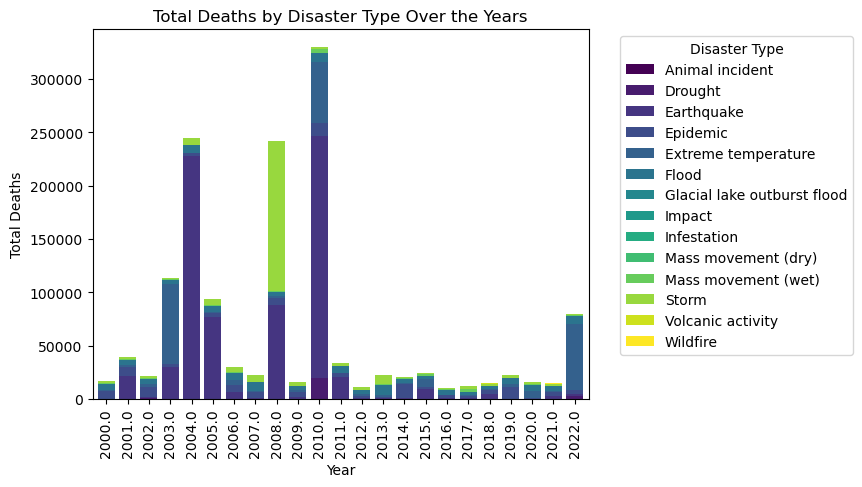

In [17]:
#group by 'Start Year' and 'Disaster Type', and sum the total deaths
deaths_by_type = columns.groupby (['Start Year','Disaster Type'])['Total Deaths'].sum().reset_index(name='Total Deaths')

#pivot data to have 'Start Year' as index, 'Disaster Type' as columns, and 'Total Deaths' as values
pivot_table = deaths_by_type.pivot(index='Start Year', columns='Disaster Type', values='Total Deaths').fillna(0)

#plot chart
plt.figure(figsize=(15,8))
pivot_table.plot(kind='bar', stacked=True, colormap='viridis',width=0.8)
plt.title('Total Deaths by Disaster Type Over the Years')
plt.ylabel('Total Deaths')
plt.xlabel('Year')
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05,1), loc='upper left')

#show plot
plt.savefig("years_total_deaths.png")
plt.show()

<Figure size 1500x800 with 0 Axes>

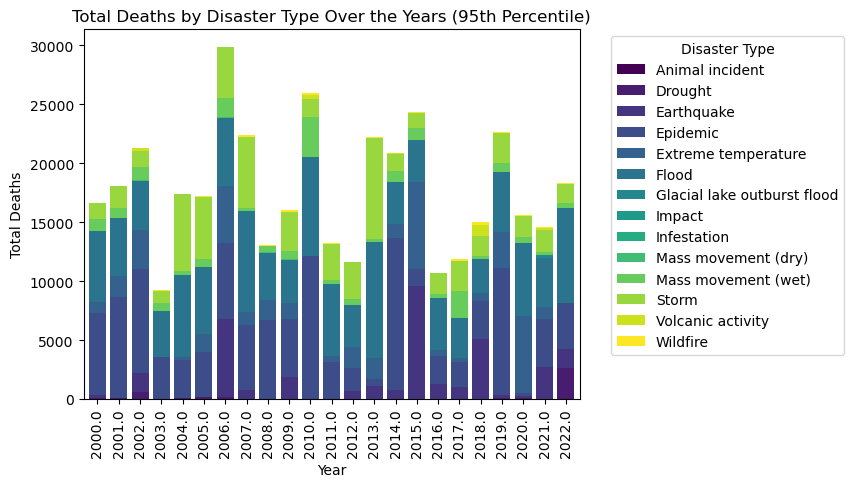

In [8]:
#calculate 95th percentile for total deaths to find any skews
total_deaths_95 = deaths_by_type['Total Deaths'].quantile(0.95)

#filter data to include rows that are below the 95 percentile
deaths_data = deaths_by_type[deaths_by_type['Total Deaths']<= total_deaths_95]

#pivot data
pivot_deaths_data = deaths_data.pivot(index='Start Year', columns='Disaster Type', values='Total Deaths').fillna(0)

#plot bar chart
plt.figure(figsize=(15,8))
pivot_deaths_data.plot(kind='bar', stacked=True,colormap='viridis',width=0.8)
plt.title('Total Deaths by Disaster Type Over the Years (95th Percentile)')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05,1), loc='upper left')

#show graph
plt.savefig("nyears_total_death95.png")
plt.show()

#
The bar charts displayed above indicate the number of total deaths per year by disaster type. Clearly shown the year with the highest average death including all disastertypes occured in 2010. To elminite and bigger data/disasters that may have skewed the outcome, the second chart creates a graph that shows the outcome when the quantile is at 0.95. There is more consistency with numbers amongst the data

### Narrow data down to Total Deaths per year by Region

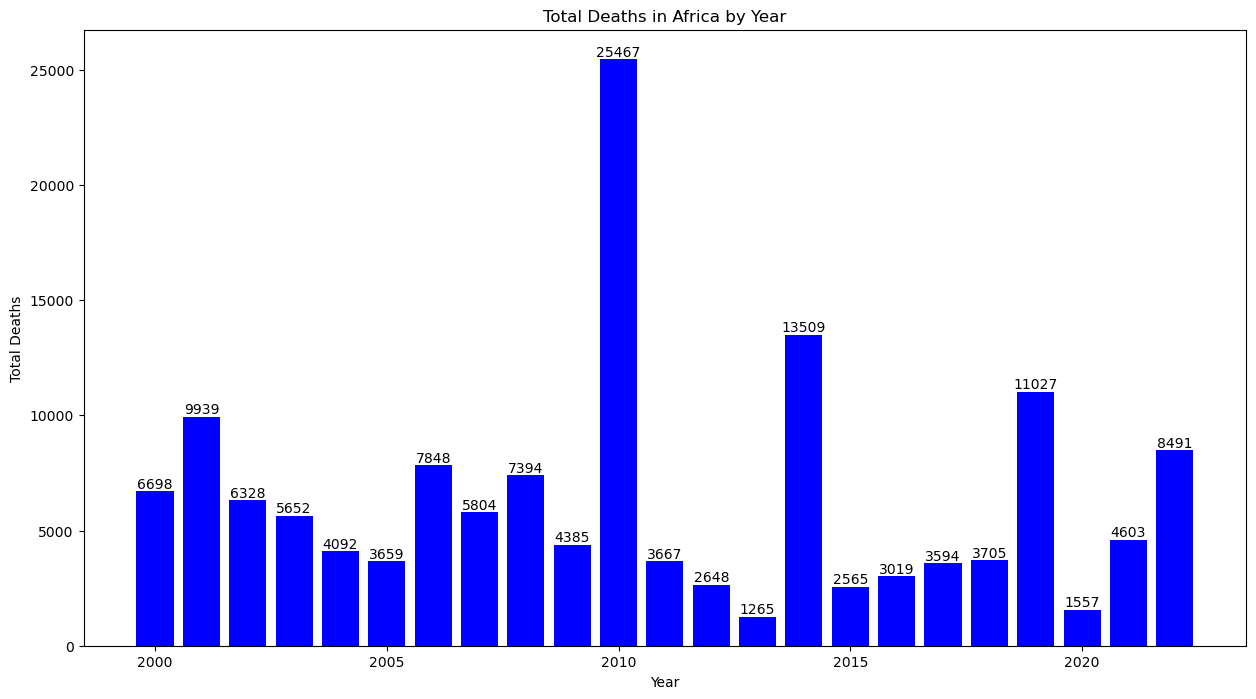

In [9]:
#filter data for Africa
africa_df = columns[columns['Region']=='Africa']

#group year and find sum of total deaths
deaths_yr_africa = africa_df.groupby('Start Year')['Total Deaths'].sum().reset_index(name='Total Deaths')

#plot bar chart with numbers
plt.figure(figsize=(15,8))
bars=plt.bar(deaths_yr_africa['Start Year'], deaths_yr_africa['Total Deaths'], color='blue')

for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height, f'{height:.0f}', ha='center',va='bottom',fontsize=10, color='black')

plt.title('Total Deaths in Africa by Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')

#show graph
plt.savefig("africa_total_deaths.png")
plt.show()

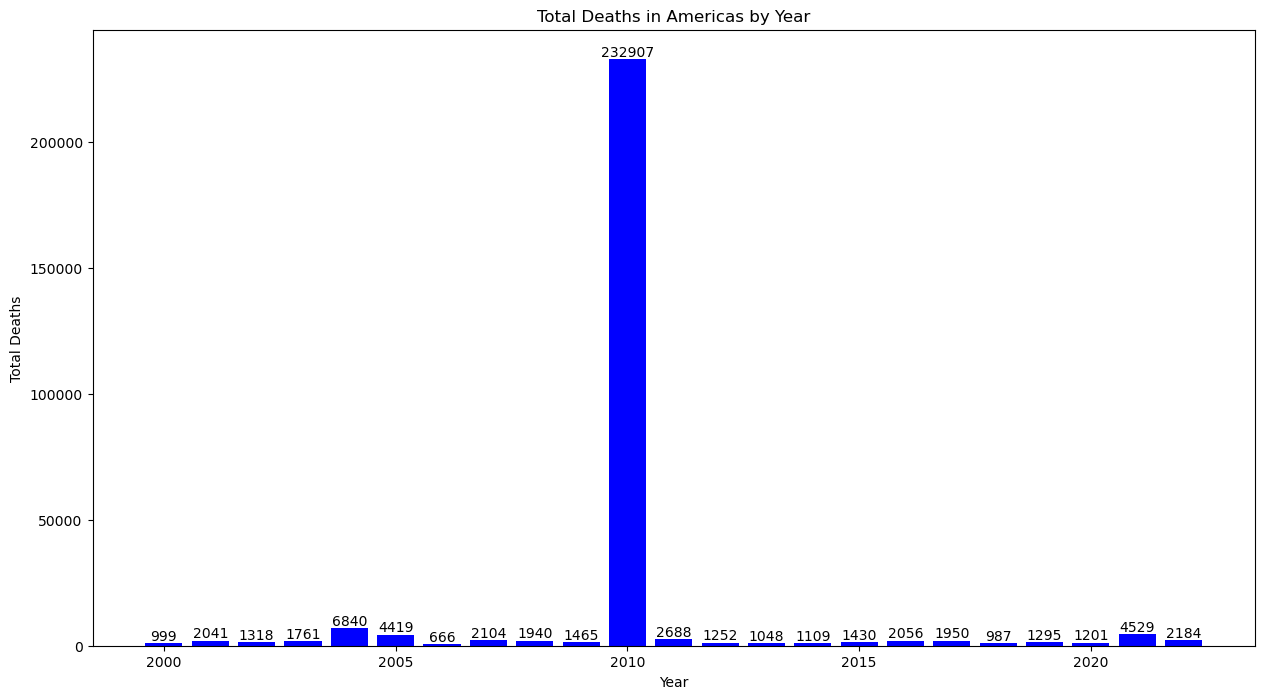

In [10]:
#filter data for Americas
americas_df = columns[columns['Region']=='Americas']

#group year and find sum of total deaths
deaths_yr_americas = americas_df.groupby('Start Year')['Total Deaths'].sum().reset_index(name='Total Deaths')

#plot bar chart with numbers
plt.figure(figsize=(15,8))
bars=plt.bar(deaths_yr_americas['Start Year'], deaths_yr_americas['Total Deaths'], color='blue')

for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height, f'{height:.0f}', ha='center',va='bottom',fontsize=10, color='black')

plt.title('Total Deaths in Americas by Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')

#show graph
plt.savefig("americas_total_deaths.png")
plt.show()

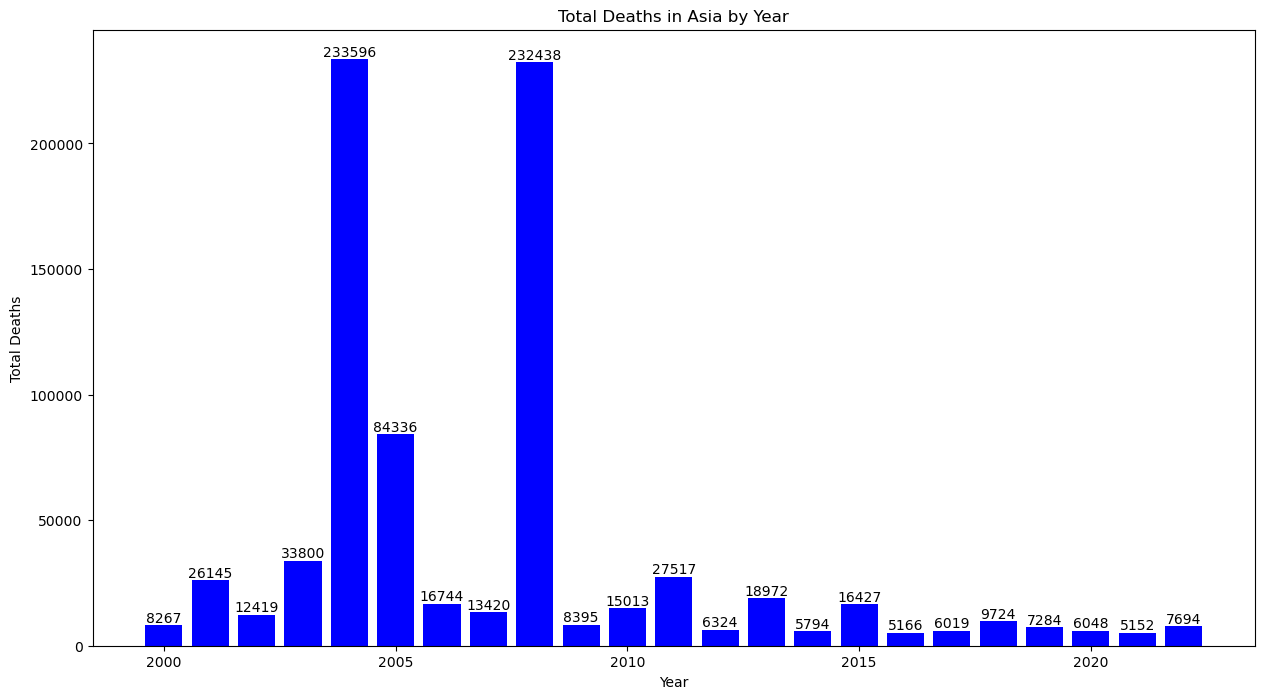

In [11]:
#filter data for Asia
asia_df = columns[columns['Region']=='Asia']

#group year and find sum of total deaths
deaths_yr_asia = asia_df.groupby('Start Year')['Total Deaths'].sum().reset_index(name='Total Deaths')

#plot bar chart with numbers
plt.figure(figsize=(15,8))
bars=plt.bar(deaths_yr_asia['Start Year'], deaths_yr_asia['Total Deaths'], color='blue')

for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height, f'{height:.0f}', ha='center',va='bottom',fontsize=10, color='black')

plt.title('Total Deaths in Asia by Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')

#show graph
plt.savefig("asia_total_deaths.png")
plt.show()

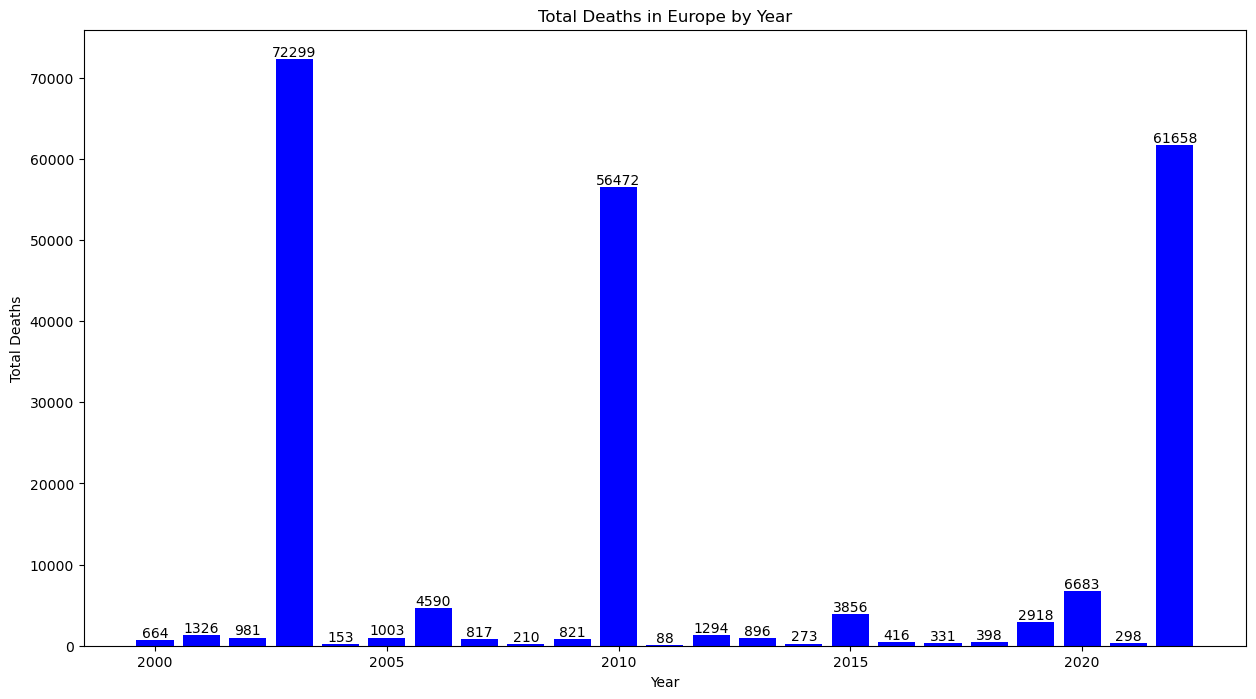

In [12]:
#filter data for Europe
europe_df = columns[columns['Region']=='Europe']

#group year and find sum of total deaths
deaths_yr_europe = europe_df.groupby('Start Year')['Total Deaths'].sum().reset_index(name='Total Deaths')

#plot bar chart with numbers
plt.figure(figsize=(15,8))
bars=plt.bar(deaths_yr_europe['Start Year'], deaths_yr_europe['Total Deaths'], color='blue')

for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height, f'{height:.0f}', ha='center',va='bottom',fontsize=10, color='black')

plt.title('Total Deaths in Europe by Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')

#show graph
plt.savefig("europe_total_deaths.png")
plt.show()

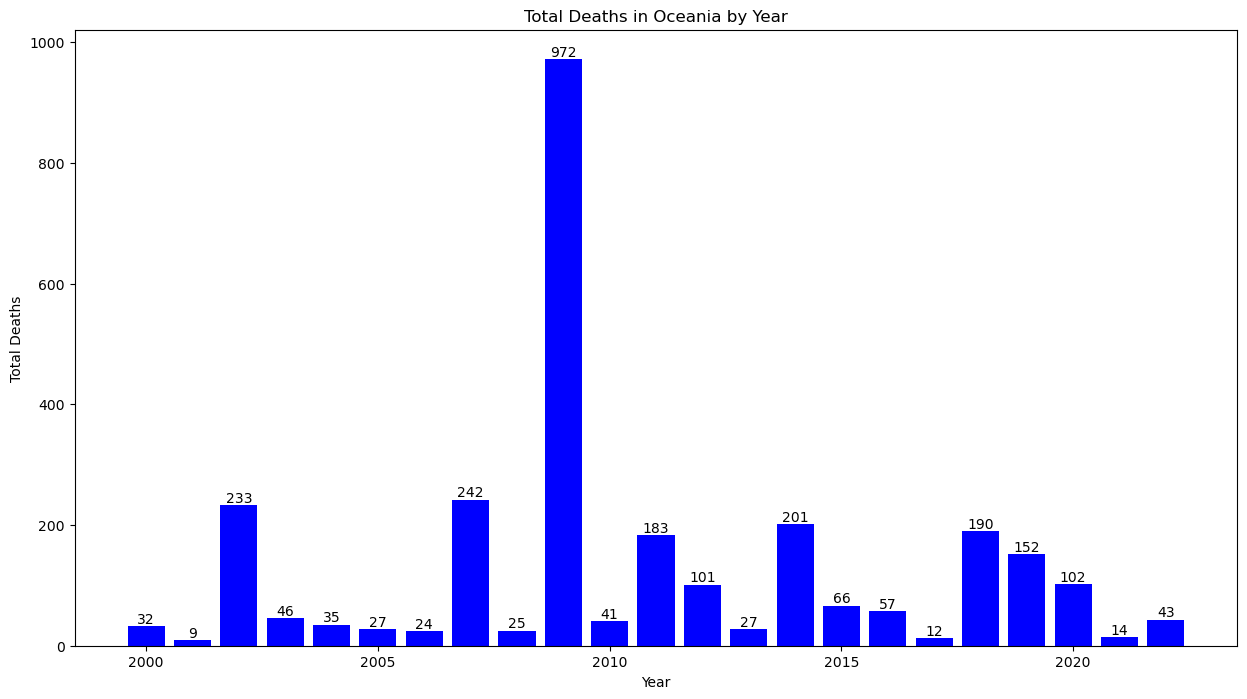

In [13]:
#filter data for Oceania
oceania_df = columns[columns['Region']=='Oceania']

#group year and find sum of total deaths
deaths_yr_oceania = oceania_df.groupby('Start Year')['Total Deaths'].sum().reset_index(name='Total Deaths')

#plot bar chart with numbers
plt.figure(figsize=(15,8))
bars=plt.bar(deaths_yr_oceania['Start Year'], deaths_yr_oceania['Total Deaths'], color='blue')

for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height, f'{height:.0f}', ha='center',va='bottom',fontsize=10, color='black')

plt.title('Total Deaths in Oceania by Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')

#show graph
plt.savefig("oceania_total_deaths.png")
plt.show()

# 
In summary the bar chart narrows down by each region and calculates the total number of deaths per year within that specified region. To measure the intensity of these natural catastrophes the data was condensed to find total deaths per year by region. The overall analysis reveals that the total number of deaths each year shows significant variability, indicating a fluctuating pattern in response to the occurrence of natural disasters. This suggefsts that the impact of these disasters on human lives is not consistent, and certain years experience higher mortality rates compared to others. Factors such as disaster intensity, preparedness, and local vulnerabilities may contribute to the observed fluctuations in the total number of deaths. 

In [15]:
#filter data for year 2010
disasters_2010 = columns[columns['Start Year']==2010]

#group 'Disaster Type' and count occurence
disaster_count_2010 = disasters_2010 = disasters_2010.groupby('Disaster Type').size().reset_index(name='Count')

#display results
print(disaster_count_2010)

         Disaster Type  Count
0              Drought     17
1           Earthquake     24
2             Epidemic     41
3  Extreme temperature     29
4                Flood    184
5          Infestation      1
6  Mass movement (wet)     32
7                Storm     94
8    Volcanic activity      6
9             Wildfire      7


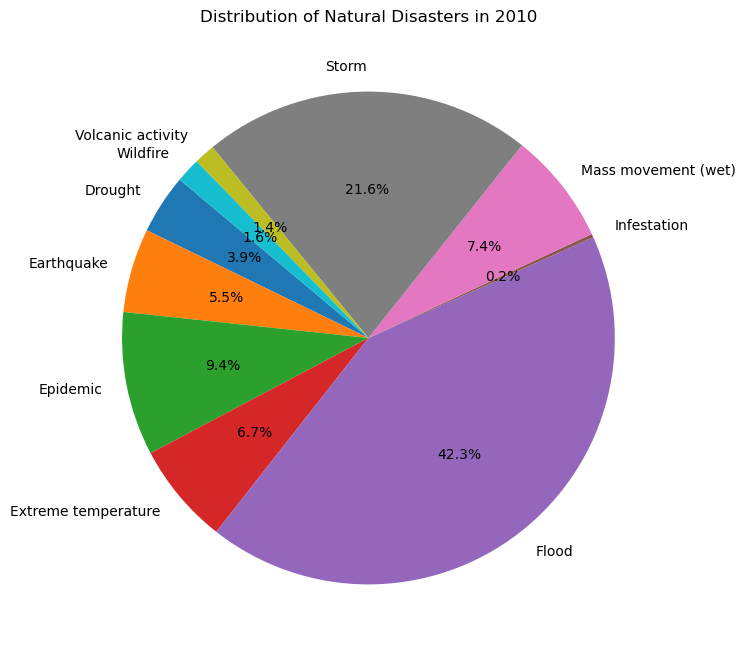

In [16]:
#plot piechart
plt.figure(figsize=(8,8))
plt.pie(disaster_count_2010['Count'], labels=disaster_count_2010['Disaster Type'], autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Natural Disasters in 2010')
plt.savefig("2010_disaster_distribution.png")
plt.show()

### Correlation between year vs Total Deaths and Total Affected

In [19]:
#group 'Start Year' and find sum of Total Deaths
deaths_by_year = columns.groupby('Start Year')['Total Deaths'].sum().reset_index(name='Total Deaths')

#calculate correlation
correlation_yr_deaths = deaths_by_year['Start Year'].corr(deaths_by_year['Total Deaths'])

print(f'Correlation between Year and Total Deaths: {correlation_yr_deaths:.2f}')

Correlation between Year and Total Deaths: -0.26


In [20]:
#group 'Start Year' and find sum of Total Deaths
affected_by_year = columns.groupby('Start Year')['Total Affected'].sum().reset_index(name='Total Affected')

#calculate correlation
correlation_yr_affected = affected_by_year['Start Year'].corr(affected_by_year['Total Affected'])

print(f'Correlation between Year and Total Affected: {correlation_yr_affected:.2f}')

Correlation between Year and Total Affected: -0.32


# 
The correlation coefficient of Total Deaths vs year and Total affected vs year both suggest a weak relationship beteen the two variables. The negative linear relationshops implie that on average as years increase, there is a slight tendency that the total number of deaths and total affected will decrease. 

### Summary Analysis

# 
In conclusion, while the number of deaths by natural disaster per year is not a direct indicatpr of climate change, it serves as an important metric to understand the immediate impact of extreme events on human populaitons. It address the underlying causes of vulnerability and implements measure to adapt and mitigate impacts of natural disasters.